<a href="https://colab.research.google.com/github/Gold2-data/employee-retention-analysis/blob/main/Employees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOLD FEYISHOLA AGBOOLA
WTF/2025/9629


The objective of this project is to analyze employee data in order to identify factors affecting employee retention. Exploratory Data Analysis (EDA) was performed to understand relationships between variables. Bar charts were used to visualize salary and departmental impact on retention. Finally, a logistic regression model was built to predict whether an employee will leave the company.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
employees = pd.read_csv("/content/drive/MyDrive/WTF_Data/HR_comma_sep 1.csv")

In [21]:
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


DATA CLEANING

In [22]:
#dataset shape
employees.shape

(14999, 10)

In [23]:
#check column info
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [24]:
#check for missing values
employees.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [25]:
#check for duplicate rows
employees.duplicated().sum()

np.int64(3008)

In [26]:
#view the duplicates
employees[employees.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [27]:
#remove the duplicate
employees = employees.drop_duplicates()
employees.shape

(11991, 10)

In [28]:
#clean column
employees.columns = employees.columns.str.lower().str.replace(" ", "_")
employees.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

In [29]:
#variable impacting retention
employees.corr(numeric_only=True)["left"].sort_values()

,left
satisfaction_level,-0.350558
work_accident,-0.125436
promotion_last_5years,-0.044657
last_evaluation,0.013520
number_project,0.030928
average_montly_hours,0.070409
time_spend_company,0.173295
left,1.000000


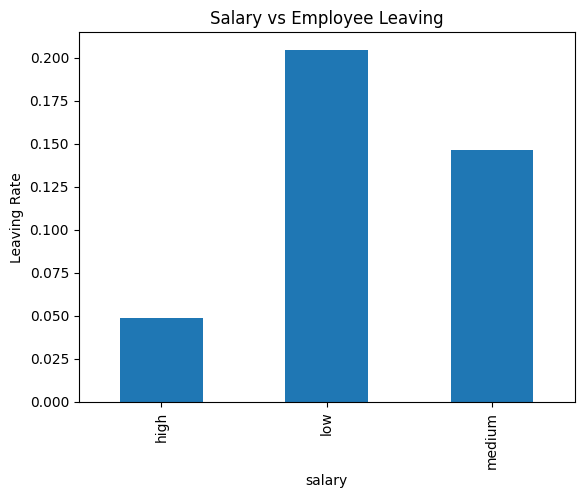

In [30]:
#salary Vs retention plot
salary = employees.groupby("salary")["left"].mean()

salary.plot(kind="bar")
plt.title("Salary vs Employee Leaving")
plt.ylabel("Leaving Rate")
plt.show()

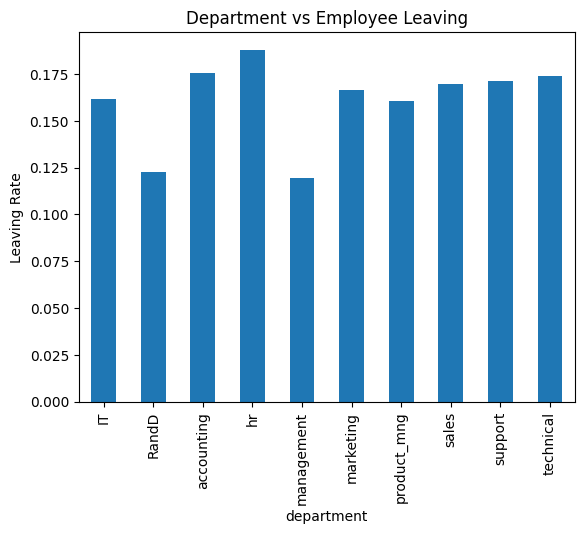

In [31]:
#department Vs retention plot
dept = employees.groupby("department")["left"].mean()

dept.plot(kind="bar")
plt.title("Department vs Employee Leaving")
plt.ylabel("Leaving Rate")
plt.show()

LOGISTICS REGRESSION

In [34]:
#encode categorical variables
from sklearn.preprocessing import LabelEncoder

le_salary = LabelEncoder()
le_dept = LabelEncoder()

employees["salary_num"] = le_salary.fit_transform(employees["salary"])
employees["dept_num"] = le_dept.fit_transform(employees["department"])

In [35]:
#feature selection
X = employees[[
    "satisfaction_level",
    "average_montly_hours",
    "promotion_last_5years",
    "salary_num",
    "dept_num"
]]

y = employees["left"]

In [40]:
#test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [41]:
#train logistics regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
#measure the accuracy
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.8649437265527303

The dataset was split into training and testing sets using a fixed random state. The logistic regression model achieved approximately 86% accuracy.